# Assignment 5 - Statistical and machine learning

In [66]:
library(caret)
install.packages("ISLR")
library(e1071)
library(ISLR)



  There is a binary version available but the source version is later:
     binary source needs_compilation
ISLR    1.2    1.4             FALSE



installing the source package 'ISLR'



##  Exercise 1 (p.368, Chap.9)

1.This problem involves hyperplanes in two dimensions.

(a) Sketch the hyperplane 1 + 3X1 − X2 = 0. Indicate the set of points for which 1 + 3X1 − X2 > 0, as well as the set of points
for which 1 + 3X1 − X2 < 0.

(b) On the same plot, sketch the hyperplane −2 + X1 + 2X2 = 0. Indicate the set of points for which −2 + X1 + 2X2 > 0, as well
as the set of points for which −2 + X1 + 2X2 < 0.

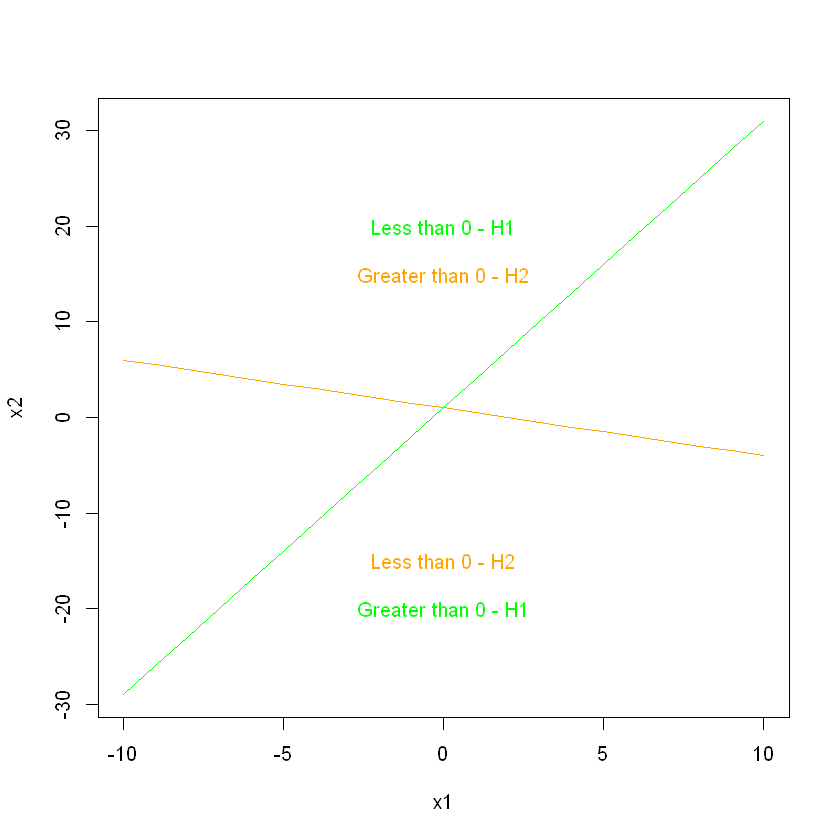

In [6]:
x1 <- -10:10
x2 <- 1 + 3 * x1
plot(x1, x2, type = "l", col = "green")
text(c(0), c(-20), "Greater than 0 - H1", col = "green")
text(c(0), c(20), "Less than 0 - H1", col = "green")
lines(x1, 1 - x1/2, col = "orange")
text(c(0), c(-15), "Less than 0 - H2", col = "orange")
text(c(0), c(15), "Greater than 0 - H2", col = "orange")

The blue line represents the first Hyperplane, the red line represents the second hyperplane.
The areas denoted as greater or less than were identified according to the combination of x1 and x2 where the condition (<0 or >0) was true

##  Exercise 2 (p.368, Chap.9)

We have seen that in p = 2 dimensions, a linear decision boundary takes the form β0+β1X1+β2X2 = 0. We now investigate a non-linear decision boundary.

(a) Sketch the curve (1 + X1)2 + (2 − X2)2 = 4.

(b) On your sketch, indicate the set of points for which (1 + X1)2 + (2 − X2)2 > 4, as well as the set of points for which
(1 + X1)2 + (2 − X2)2 ≤ 4.

(c) Suppose that a classifier assigns an observation to the blue class if (1 + X1)2 + (2 − X2)2 > 4, and to the red class otherwise. To what class is the observation
(0, 0) classified? (−1, 1)? (2, 2)? (3, 8)?

(d) Argue that while the decision boundary in (c) is not linear in terms of X1 and X2, it is linear in terms of X1, X1^2, X2, and
X2^2

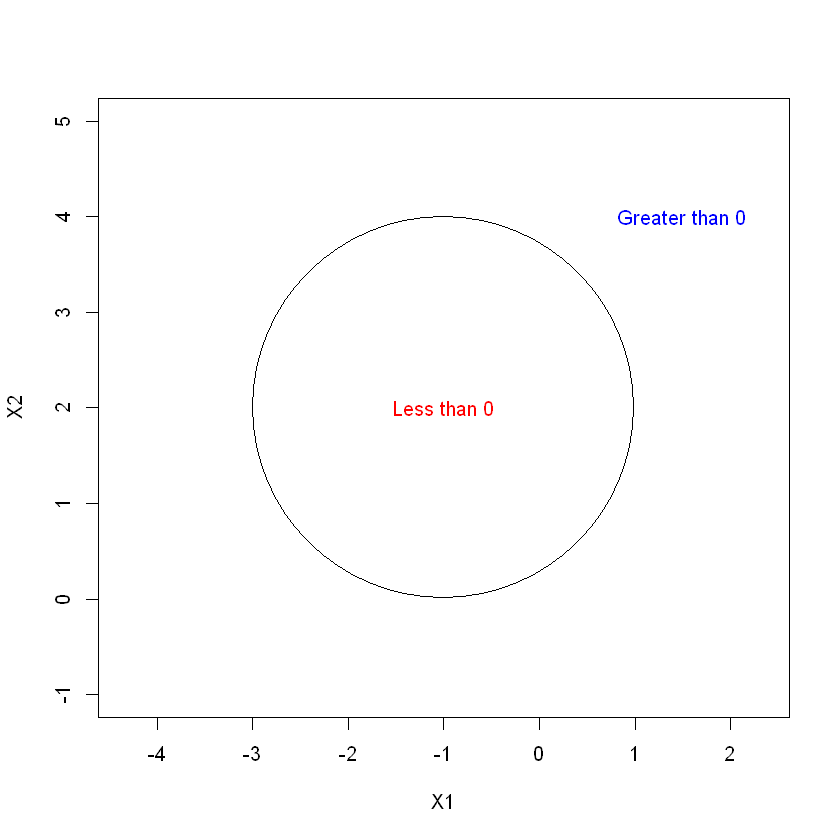

In [11]:
#Ploting a circle of radius 2
plot(NA, NA, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(2), add = TRUE, inches = FALSE)
text(c(1.5), c(4), "Greater than 0", col = "blue")
text(c(-1), c(2), "Less than 0", col = "red")


C. 
* observation (0, 0)= Replacing the values for x1 and x2 the result is 5, which means that the observation is classified as blue.

* Observation (−1, 1)=Replacing the values for x1 and x2 the result is < 4, which means that the observation is classified as red.

* Observation (2, 2)= Replacing the values for x1 and x2 the result is >4, which means that the observation is classified as blue.
* Observation (3, 8) = Replacing the values for x1 and x2 the result is >4, which means that the observation is classified as blue.

d. The equation can be expanded to: X1^2+X2^2+2X1−4X2+1=0. Which is linear in terms of  X1, X1^2, X2, and
X2^2

## Excercise 4 (p.369, Chap.9)

Generate a simulated two-class data set with 100 observations and two features in which there is a visible but non-linear separation between the two classes. Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifier on the training data. Which technique performs best on the test data? Make plots and report training and test error rates in order to back up
your assertions.


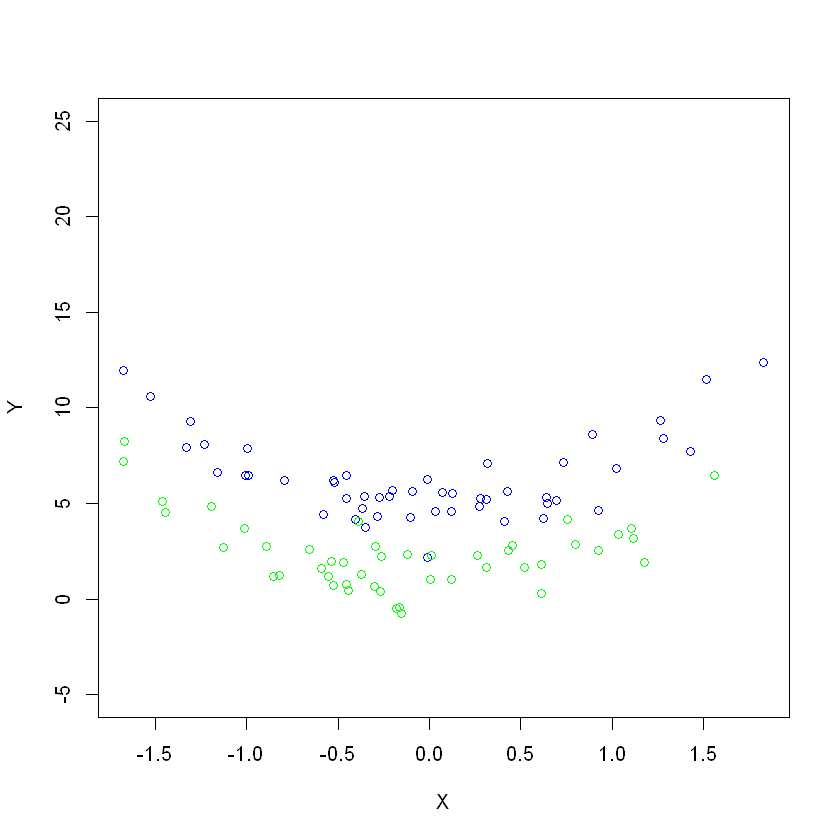

In [28]:
x1 <- rnorm(100)
y <- 2*x1^2+3 + rnorm(100)
class <- sample(100, 50)
y[class] <- y[class] + 2
y[-class] <- y[-class] - 2
plot(x1[class], y[class], col = "blue", xlab = "X", ylab = "Y", ylim = c(-5, 25))
points(x1[-class], y[-class], col = "green")

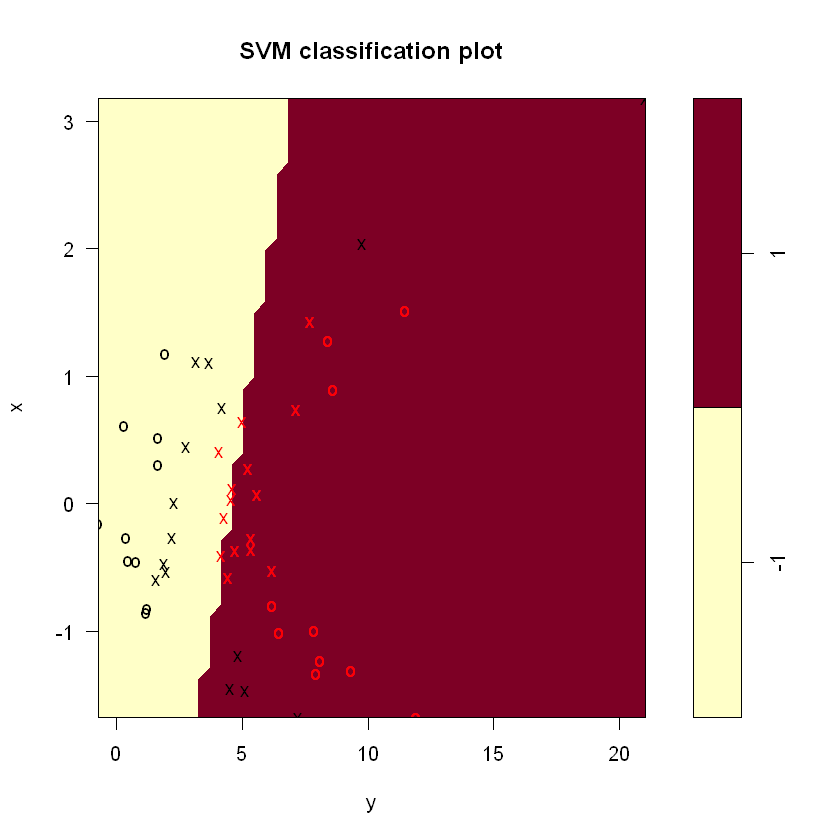

In [43]:

z <- rep(-1, 100)
z[class] <- 1
data <- data.frame(x = x1, y = y, z = as.factor(z))
train <- sample(100, 50)
data.train <- data[train, ]
data.test <- data[-train, ]
svm.linear <- svm(z ~ ., data = data.train, kernel = "linear", cost = 5)
plot(svm.linear, data.train)

In [44]:
table(predict = predict(svm.linear, data.train), truth = data.train$z)

       truth
predict -1  1
     -1 19  1
     1   6 24

According to the confusion matrix we see that 7 observations are missclasified

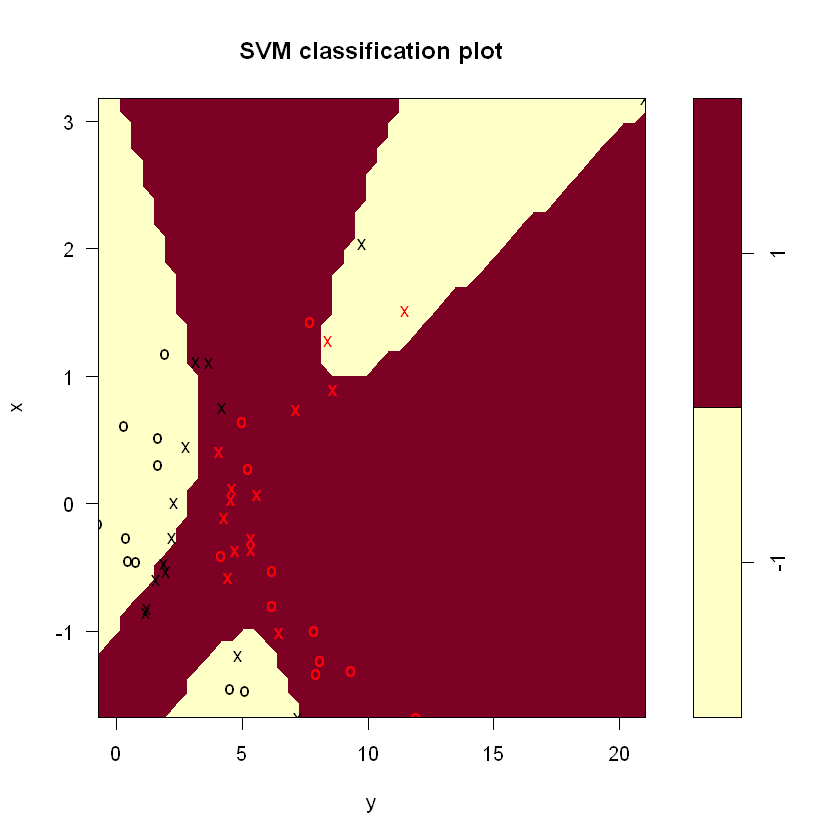

In [56]:
svm.poly <- svm(z ~ ., data = data.train, kernel = "polynomial", cost = 60)
plot(svm.poly, data.train)

In [57]:
table(predict = predict(svm.poly, data.train), truth = data.train$z)

       truth
predict -1  1
     -1 16  1
     1   9 24

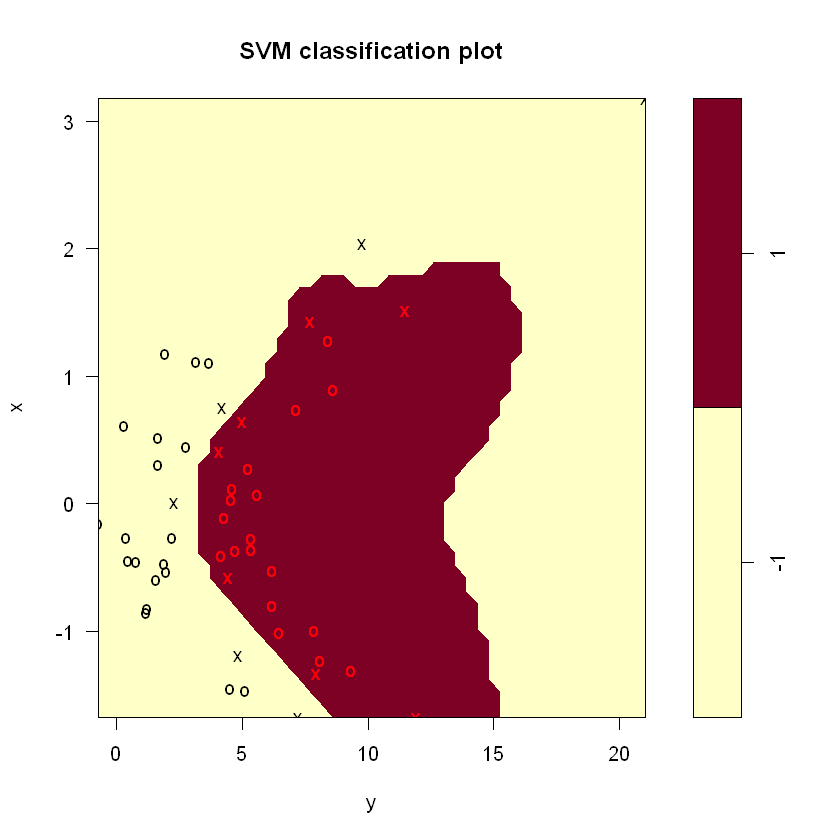

In [59]:
svm.radial <- svm(z ~ ., data = data.train, kernel = "radial", gamma = 1, cost = 15)
plot(svm.radial, data.train)

## Metrics in test dataset


In [60]:
table(predict = predict(svm.radial, data.train), truth = data.train$z)


       truth
predict -1  1
     -1 25  0
     1   0 25

In [62]:
table(predict = predict(svm.linear, data.test), truth = data.test$z)

       truth
predict -1  1
     -1 19  4
     1   6 21

In [63]:
table(predict = predict(svm.poly, data.test), truth = data.test$z)

       truth
predict -1  1
     -1 15  3
     1  10 22

In [64]:
table(predict = predict(svm.radial, data.test), truth = data.test$z)


       truth
predict -1  1
     -1 24  2
     1   1 23

Comparing the performance of the 3 models in the test dataset it is possible to observe that the svm with radial kernel gives us better results than the previous 2 models

## Excercise 7 (p.371, Chap.9)

In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the Auto data set.

(a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage
below the median.

(b) Fit a support vector classifier to the data with various values of cost, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results.

(c) Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of gamma and degree and cost. Comment on your results.

(d) Make some plots to back up your assertions in (b) and (c).


In [67]:
var <- ifelse(Auto$mpg > median(Auto$mpg), 1, 0)
Auto$mpglevel <- as.factor(var)

In [68]:
set.seed(1)
tune.out <- tune(svm, mpglevel ~ ., data = Auto, kernel = "linear", ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100, 1000)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.01025641 

- Detailed performance results:
   cost      error dispersion
1 1e-02 0.07653846 0.03617137
2 1e-01 0.04596154 0.03378238
3 1e+00 0.01025641 0.01792836
4 5e+00 0.02051282 0.02648194
5 1e+01 0.02051282 0.02648194
6 1e+02 0.03076923 0.03151981
7 1e+03 0.03076923 0.03151981


In [69]:
set.seed(1)
tune.out <- tune(svm, mpglevel ~ ., data = Auto, kernel = "polynomial", ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100), degree = c(2, 3, 4)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost degree
  100      2

- best performance: 0.3013462 

- Detailed performance results:
    cost degree     error dispersion
1  1e-02      2 0.5511538 0.04366593
2  1e-01      2 0.5511538 0.04366593
3  1e+00      2 0.5511538 0.04366593
4  5e+00      2 0.5511538 0.04366593
5  1e+01      2 0.5130128 0.08963366
6  1e+02      2 0.3013462 0.09961961
7  1e-02      3 0.5511538 0.04366593
8  1e-01      3 0.5511538 0.04366593
9  1e+00      3 0.5511538 0.04366593
10 5e+00      3 0.5511538 0.04366593
11 1e+01      3 0.5511538 0.04366593
12 1e+02      3 0.3446154 0.09821588
13 1e-02      4 0.5511538 0.04366593
14 1e-01      4 0.5511538 0.04366593
15 1e+00      4 0.5511538 0.04366593
16 5e+00      4 0.5511538 0.04366593
17 1e+01      4 0.5511538 0.04366593
18 1e+02      4 0.5511538 0.04366593


In [70]:
set.seed(1)
tune.out <- tune(svm, mpglevel ~ ., data = Auto, kernel = "radial", ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100), gamma = c(0.01, 0.1, 1, 5, 10, 100)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
  100  0.01

- best performance: 0.01282051 

- Detailed performance results:
    cost gamma      error dispersion
1  1e-02 1e-02 0.55115385 0.04366593
2  1e-01 1e-02 0.08929487 0.04382379
3  1e+00 1e-02 0.07403846 0.03522110
4  5e+00 1e-02 0.04852564 0.03303346
5  1e+01 1e-02 0.02557692 0.02093679
6  1e+02 1e-02 0.01282051 0.01813094
7  1e-02 1e-01 0.21711538 0.09865227
8  1e-01 1e-01 0.07903846 0.03874545
9  1e+00 1e-01 0.05371795 0.03525162
10 5e+00 1e-01 0.02820513 0.03299190
11 1e+01 1e-01 0.03076923 0.03375798
12 1e+02 1e-01 0.03583333 0.02759051
13 1e-02 1e+00 0.55115385 0.04366593
14 1e-01 1e+00 0.55115385 0.04366593
15 1e+00 1e+00 0.06384615 0.04375618
16 5e+00 1e+00 0.05884615 0.04020934
17 1e+01 1e+00 0.05884615 0.04020934
18 1e+02 1e+00 0.05884615 0.04020934
19 1e-02 5e+00 0.55115385 0.04366593
20 1e-01 5e+00 0.55115385 0.04366593
21 1e+00 5e+00 0.49493590 0.04724924
22

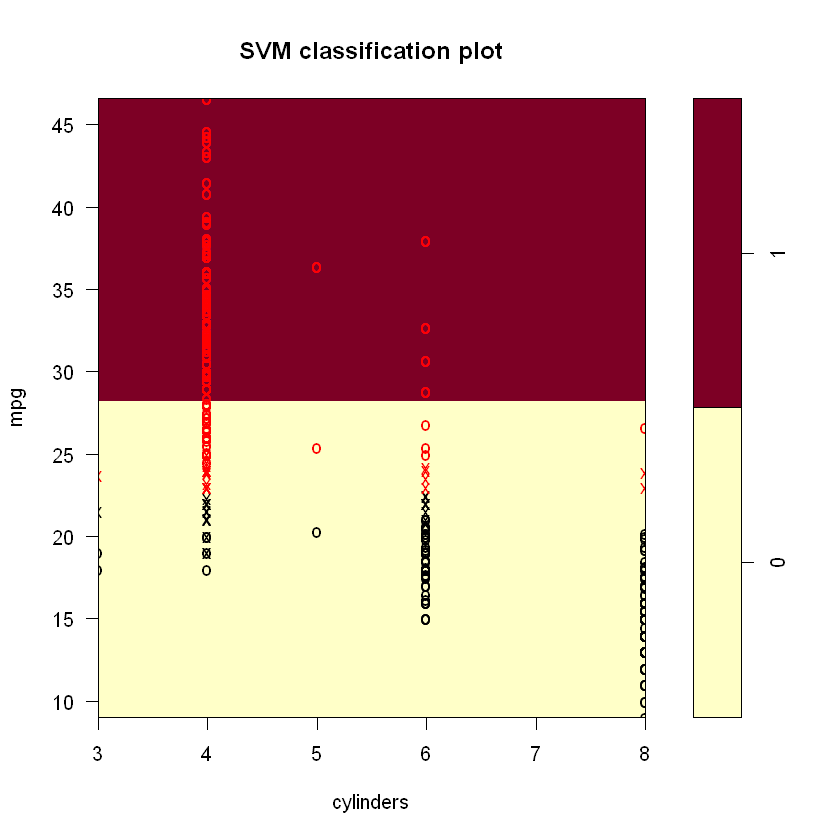

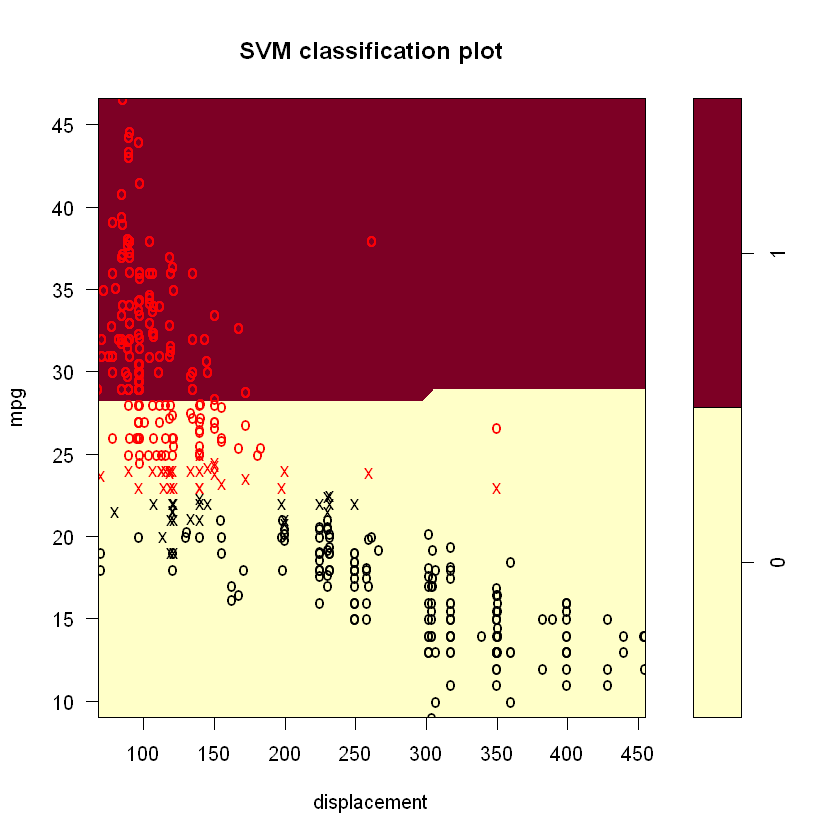

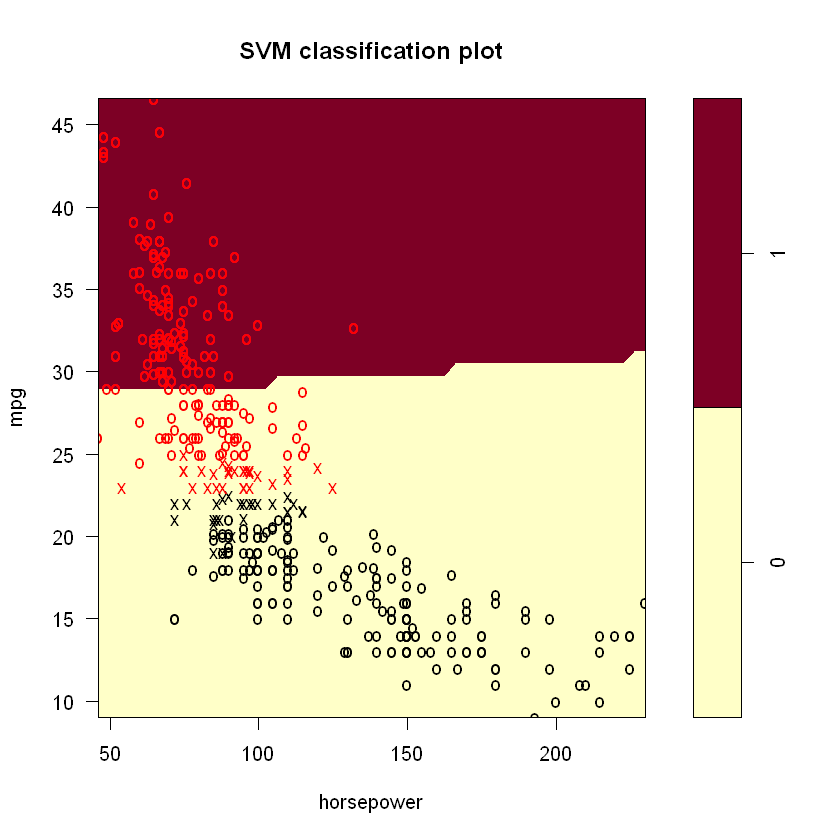

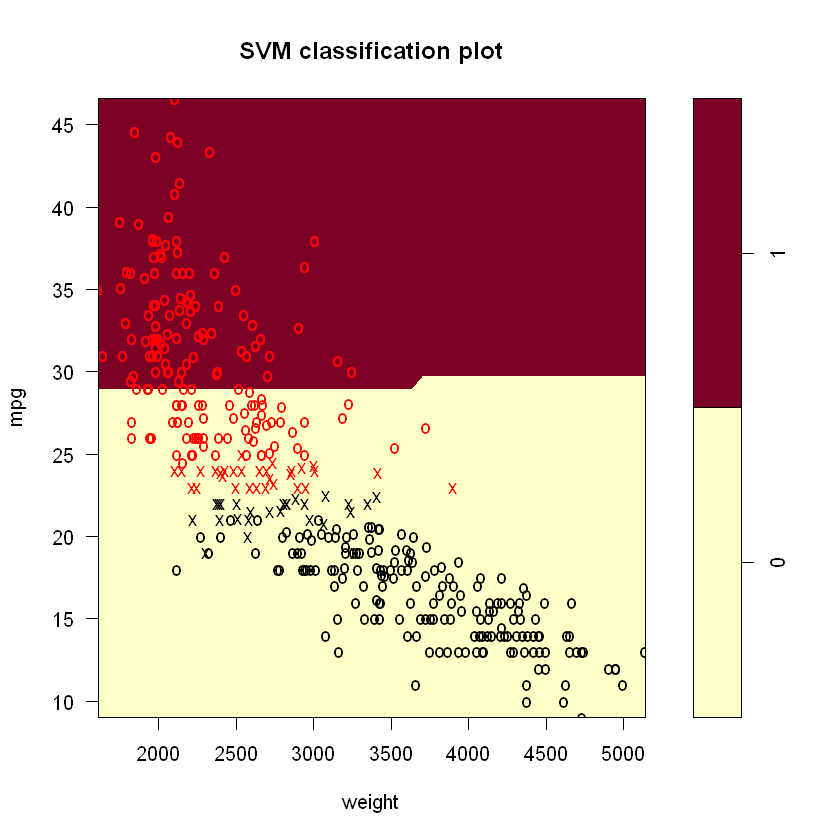

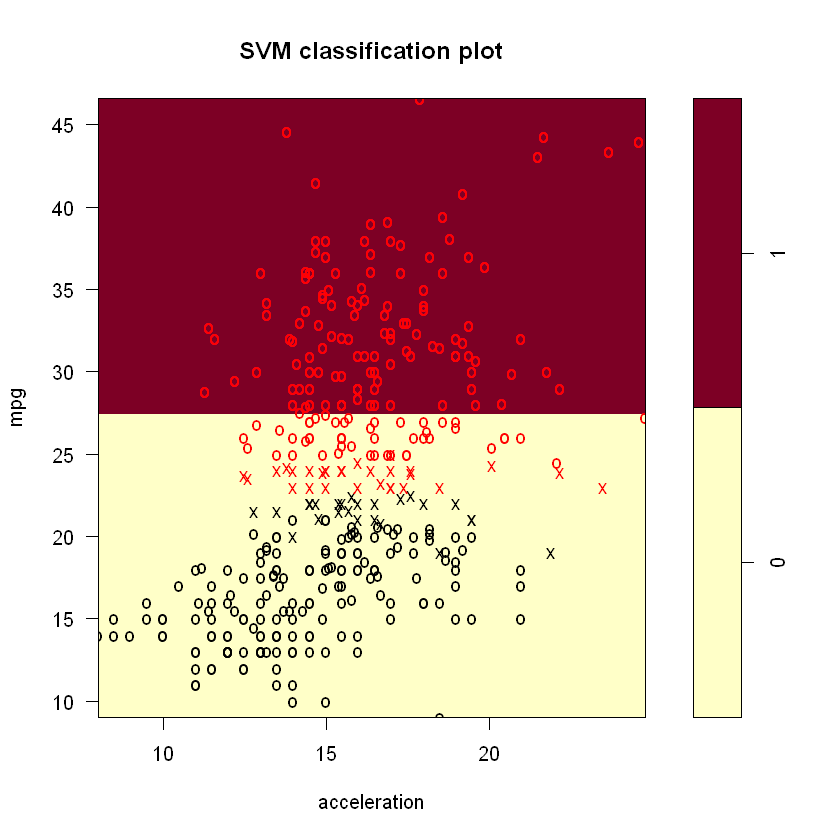

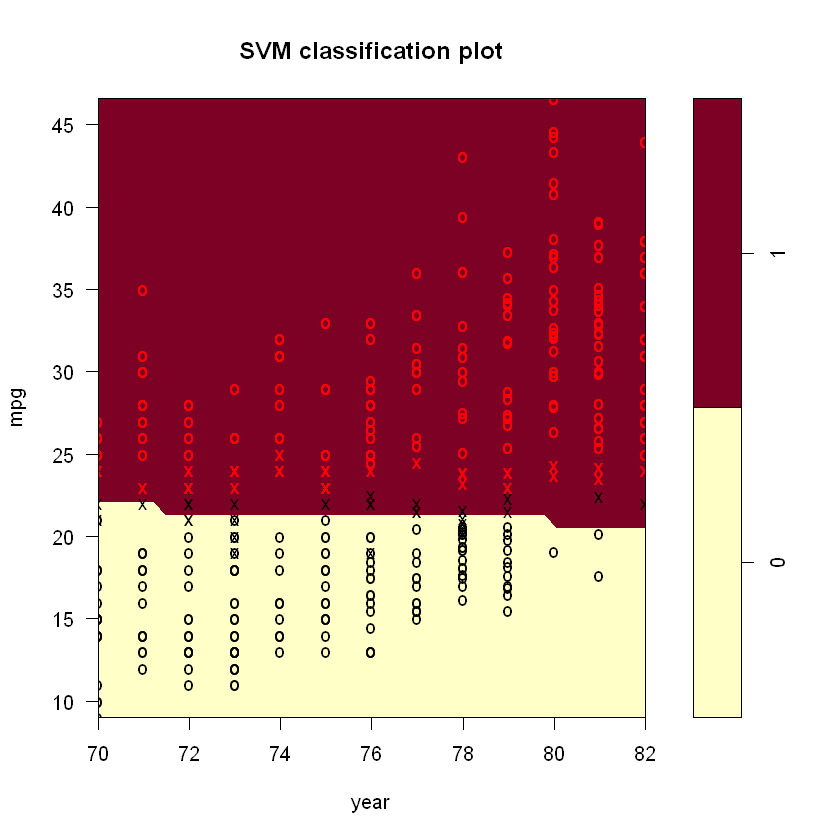

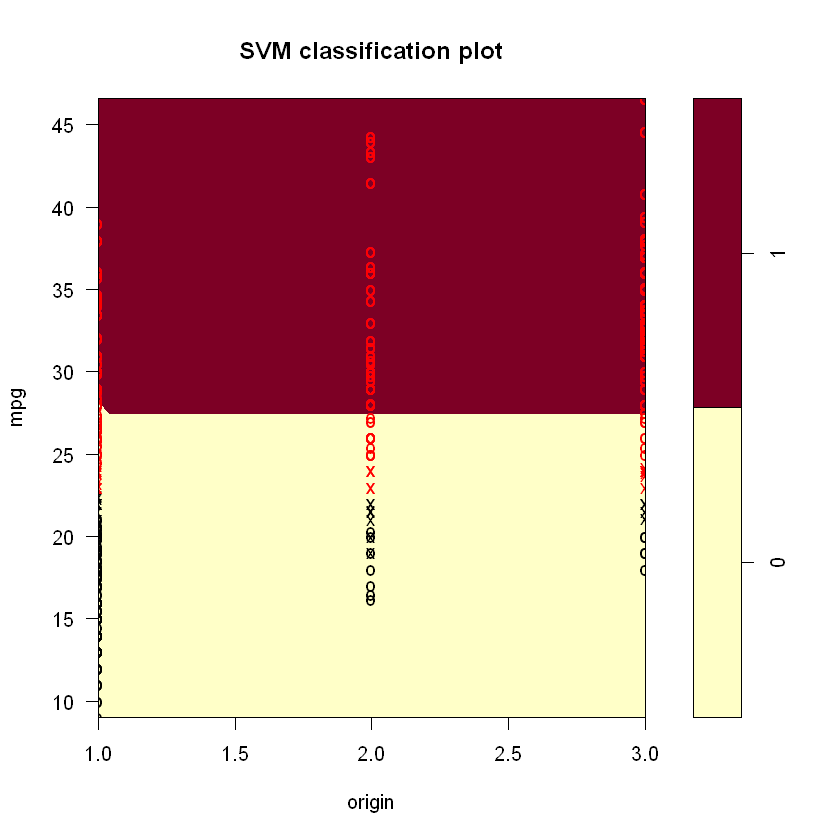

In [71]:
svm.linear <- svm(mpglevel ~ ., data = Auto, kernel = "linear", cost = 1)
svm.poly <- svm(mpglevel ~ ., data = Auto, kernel = "polynomial", cost = 100, degree = 2)
svm.radial <- svm(mpglevel ~ ., data = Auto, kernel = "radial", cost = 100, gamma = 0.01)
plotpairs = function(fit) {
    for (name in names(Auto)[!(names(Auto) %in% c("mpg", "mpglevel", "name"))]) {
        plot(fit, Auto, as.formula(paste("mpg~", name, sep = "")))
    }
}
plotpairs(svm.linear)